# Differential Calculus


In [3]:
from sympy import symbols
from sympy.plotting import plot
from sympy import diff
from sympy import sqrt, exp, cos, sin, pi, ln
from sympy import lambdify
import numpy as np
import numbers
import matplotlib.pyplot as plt
from nose.tools import assert_almost_equal, assert_true, assert_equal, assert_raises
from numpy.testing import assert_allclose

In [4]:
x = symbols('x')
def func0(x):
    return x**3
def func1(x):
    """returns a third-order polynomial in x"""
    return sin(2*pi*x/6)*(x-3)**3-(5*(x+2)**2)+4*x*exp(-x**2)

def func2(x):
    """returns a third-order polynomial in x"""
    return (x-3)**3-5*(x+2)**2+4*x

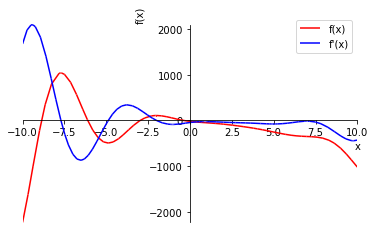

In [5]:
p = plot(func1(x), diff(func1(x)), (x, -10, 10), show=False, legend=True)
p[0].line_color = 'red'
p[0].label = "f(x)"
p[1].line_color = 'blue'
p[1].label="f'(x)"
p.show()

## Sympy [``lambdify``](http://docs.sympy.org/latest/modules/utilities/lambdify.html)

Sympy has a function ``lambdify`` that we can use to generate Python functions from Sympy expressions. We will create Python function versions of ``func1`` and its first derivative that we can use with numpy and matplotlib.

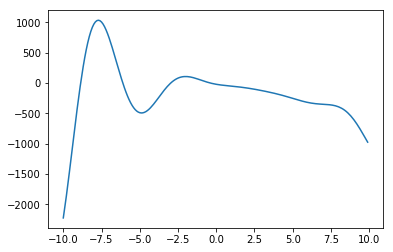

In [6]:
fp1 = lambdify(x, func1(x), "numpy")
dfp1 = lambdify(x,diff(func1(x)), "numpy")
tt = np.arange(-10, 10, 0.1)
plt.plot(tt,fp1(tt))

**Problem 1. (25 points):** Write a function named ``d1a`` that computes the first derivative of a 1-D numpy array using a backward difference ($f_i'\approx \frac{f_i-f_{i-1}}{h}$) approximation of the derivative. The function should use numpy array slicing rather than a ``for`` loop. The resulting signal should have the same length as the input with a zero for the value where you did not compute the derivative. The function should take a numpy array as a positional argument and have a keyword argument ``h=1`` that provides the unit step size (i.e. what the length of one step in the array represents. 

Python has an [``isinstance``](https://docs.python.org/3/library/functions.html#isinstance) function that returns True if a variable is an instance of a type (e.g. ``str``) and False if it is not. The Python [``numbers``](https://docs.python.org/3.5/library/numbers.html) module provides definitions of number types, including a generic ``Number`` type of which all numbers are an instance. Use ``isinstance`` in conjunction with the ``numpy`` package and the ``numbers`` module to check if ``s`` is a numpy array and that ``h`` is a number. For both tests raise a ``TypeError`` if the user did not provide the corrected data type. Raise a `TypeError` if `h` is not positive. The function should have a docstring. Test the function with ``fp1``.

**Hints:** 

1. Use the [``numpy.zeros``](http://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function.
1. The type of a numpy arra is ``ndarray``.

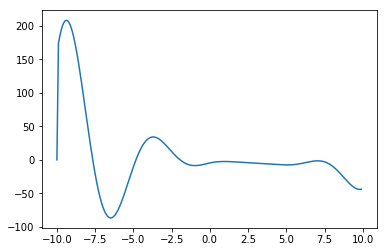

In [114]:
# YOUR CODE HERE
import numpy as np
import numbers

def d1a(s, h=1):
    """
    Computes the 1st derivative of a 1-D numpy array using a backward difference approximation of the derivative.
    Arguments:
        s: the 1-D numpy array we will take the first derivative of.
        h: the unit step size (i.e. what the length of one step in the array represents).
    Returns:
        d1: thd 1st derivative of s.
    """
    if not isinstance(s, np.ndarray) or not isinstance(h, numbers.Number):
        raise TypeError
    elif h<0:
        raise ValueError

    d1 = np.zeros(len(s))
    d1[1:] = (s[1:]-s[:-1]) / h
    
    return d1

plt.plot(tt, d1a(fp1(tt))) 

In [47]:
assert_equal(len(d1a(fp1(tt), h=0.1)), len(tt))

In [48]:
assert_true(isinstance(d1a(fp1(tt), h=0.1), np.ndarray))

In [49]:
assert_raises(TypeError, d1a, [1,2,3,4])

In [50]:
assert_raises(TypeError, d1a, np.arange(-10, 10, 0.1), h=[0.1,0.1])

In [51]:
assert_raises(ValueError, d1a, np.arange(-10, 10, 0.1), h=-0.1)

**Problem 2. (15 points)** Repeat problem 2 but create a function ``d1b`` that uses a centered difference ($f_i' \approx \frac{f_{i+1}-f_{i-1}}{2h}$). Again make sure that the resulting signal has the same length as the input signal and use slicing rather than a for loop to make the computation. Test the function with ``fp1``.

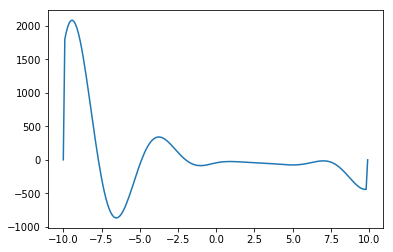

In [113]:
# YOUR CODE HERE
import numpy as np
import numbers

def d1b(s, h=1):
    """
    Computes the 1st derivative of a 1-D numpy array using a centered difference approximation of the derivative.
    Arguments:
        s: the 1-D numpy array we will take the first derivative of.
        h: the unit step size (i.e. what the length of one step in the array represents).
    Returns:
        d1: thd 1st derivative of s.
    """
    if not isinstance(s, np.ndarray) or not isinstance(h, numbers.Number):
        raise TypeError
    elif h<0:
        raise ValueError

    d1 = np.zeros(len(s))
    d1[1:-1] = (s[2:]-s[:-2]) / (2*h)
    
    return d1

plt.plot(tt, d1b(fp1(tt), h=0.1))  

In [64]:
assert_equal(len(d1b(fp1(tt), h=0.1)), len(tt))

In [65]:
assert_true(isinstance(d1b(fp1(tt), h=0.1), np.ndarray))

In [66]:
assert_raises(TypeError, d1b, [1,2,3,4])

In [67]:
assert_raises(TypeError, d1b, np.arange(-10, 10, 0.1), h=[0.1,0.1])

In [68]:
assert_raises(ValueError, d1b, np.arange(-10, 10, 0.1), h=-0.1)

**Problem 3. (30 points)**

Mathematicians are critical of the simple differences we have been using to approximate derivatives because they are inaccurate. More accurate approximations can be derived based on [Taylor series expansions](https://en.wikipedia.org/wiki/Taylor_series#Definition) of functions. A common approximation of the first derivative is:

$$
f_i' \approx \frac{-f_{i+2}+8f_{i+1}-8f_{i-1}+f_{i-2}}{12h}.
$$

This approximation to the derivative has an error an the order of the fourth power of the step size ($O(h^4)$).
(Strickwerda, *Finite Difference Schems and Partial Differential Equations,* p. 69)

Write a function ``d1c`` that implements the above approximation to the first derivative. Provide the same type checking (e.g. numpy array, number) as with problems 1 and 2. The function should have a docstring.

Test the function with fp1.


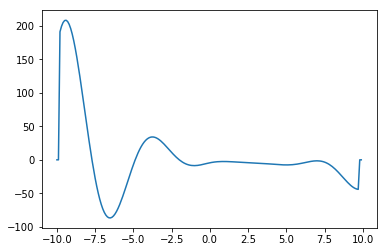

In [112]:
# YOUR CODE HERE
import numpy as np
import numbers

def d1c(s, h=1):
    """
    Computes the 1st derivative of a 1-D numpy array using a Taylor series expansion of the 1st derivative.
    Arguments:
        s: the 1-D numpy array we will take the first derivative of.
        h: the unit step size (i.e. what the length of one step in the array represents).
    Returns:
        d1: thd 1st derivative of s.
    """
    if not isinstance(s, np.ndarray) or not isinstance(h, numbers.Number):
        raise TypeError
    elif h<0:
        raise ValueError

    d1 = np.zeros(len(s))
    d1[2:-2] = ( -s[4:] + (8*s[3:-1]) - (8*s[1:-3]) + s[:-4] ) / (12*h)
    
    return d1

plt.plot(tt, d1c(fp1(tt)))

In [75]:
assert_equal(len(d1c(fp1(tt), h=0.1)), len(tt))

In [76]:
assert_true(isinstance(d1c(fp1(tt), h=0.1), np.ndarray))

In [77]:
assert_raises(TypeError, d1c, [1,2,3,4])

In [78]:
assert_raises(TypeError, d1c, np.arange(-10, 10, 0.1), h=[0.1,0.1])

In [79]:
assert_raises(ValueError, d1c, np.arange(-10, 10, 0.1), h=-0.1)

In [111]:
def relative_error(signal, true_signal, eps=0.1):
    """
    Computes the relative error between the estimated signal and true signal. Relative error is returns as
    100*(signal-true_signal)/true_signal.
    
    In order to avoid divide by zero issues, we assign a zero if the true_signal value is less than eps
    Arguments:
        signal: a 1D numpy array
        true_signal: a 1D numpy array
        eps: a floating point number indicating deviation from zero
    Returns:
        A numpy array with the relative error at each point
    
    """
    
    return np.where(np.abs(true_signal)>eps, 100*((signal-true_signal)/true_signal), 0)



To get a handle on the amount of error for each derivative, use the ``relative_error`` function to compute the error between the true derivative value (dfp1) and the derivative of the signal computed with each of the three functions (``d1a``, ``d1b``, ``d1c``).

Ignore the end points (where derivatives are not computed).

Create two scatter plots with matplotlib that shows the relative error of each derivative.

In the first scatter plot, plot the relative error of each derivative vs time (``tt``). In the seconed plot, plot the relative error of each derivative vs the true derivative. 

Set the ylimit for the plots so that the figure illustrates the relative performance of each technique.

In [81]:
dc = d1c(fp1(tt), h=0.1)
db = d1b(fp1(tt), h=0.1)
da = d1a(fp1(tt), h=0.1)
dtrue = dfp1(tt)

(-10, 10)

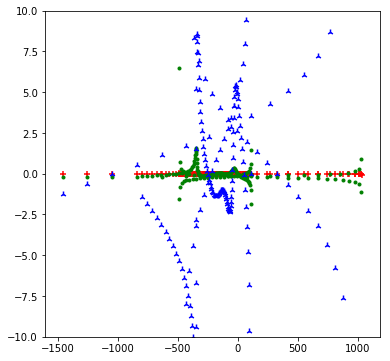

In [82]:
start = 4# 45
end = -4 #int(len(tt)*0.8)
f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.scatter(fp1(tt)[start:end], relative_error(dc, dtrue)[start:end], marker='+', color='r')
ax.scatter(fp1(tt)[start:end], relative_error(db, dtrue)[start:end], marker='.', color='green')
ax.scatter(fp1(tt)[start:end], relative_error(da, dtrue)[start:end], marker='2', color='b')

plt.ylim(-10, 10)

(-10, 10)

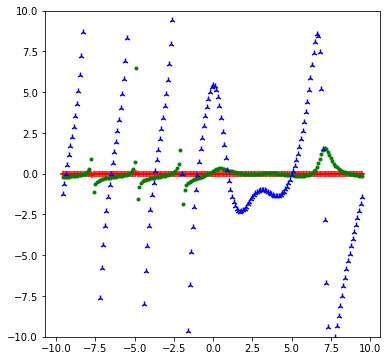

In [83]:
start = 4
end = -4 #int(len(tt)*0.8)
f, ax = plt.subplots()
f.set_size_inches(6,6)
ax.scatter(tt[start:end], relative_error(dc, dtrue)[start:end], marker='+', color='r')
ax.scatter(tt[start:end], relative_error(db, dtrue)[start:end], marker='.', color='green')
ax.scatter(tt[start:end], relative_error(da, dtrue)[start:end], marker='2', color='b')

#plt.plot(100*abs(dtrue[start:end]-db[start:end])/abs(dtrue[start:end]), 'g')
#plt.plot(100*abs(dtrue[start:end]-da[start:end])/abs(dtrue[start:end]), 'b')

plt.ylim(-10, 10)

**Problem 6 (40 points):**

A pharmokinetic model of drug absorption and clearance is given by

$$
y = \frac{Ab}{b-k}\left(e^{-kt}-e^{-bt}\right)
$$

where $k$ is a time constant that describes how the drug is cleared from the body (e.g. through urine) and $b$  is the clearance rate for the digestive system with $b > k$ typically.

For $A = 200$, $k = 0.35$, and $b = 0.46$ we want to find when the drug concentration is a maximum. Sympy provides [functions](http://docs.sympy.org/dev/modules/solvers/solvers.html#algebraic-equations) for finding the roots of an equation (when the equation equals zero) symbolically.

Compare the difference between the maximum dose time you find using sympy and what you obtain numerically using the function ``d1c`` defined above and finding the position in the resulting numpy array closest to zero. Use the numpy ``arange`` function with various step sizes (``h``). 

**Hints:**

1. Because ``d1c`` does not compute the derivatives near the endpoints of the array, you need to exclude these points when searching for the minimum.
1. Use the [numpy.argmin](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) function to find the minimum location in the derivative array and then use that index to find the value in the time array.
1. Because the derivative is both positive and negative, use the absolute value of the derivative to find the location nearest to zero.
1. Plot the derivative function and select reasonable limits to search for the minimum. (You need to be sure to exclude the non-computed points from the search.)
1. Remember ``d1c`` needs to be passed ``h``.

In [86]:
from scipy.optimize import newton
from sympy.solvers import solve

In [110]:
ts = symbols('ts')
def kinetics(t, A=200, b=0.46, k=0.35):
    # YOUR CODE HERE
    """
    Represents a pharmokinetic model of drug absorption and clearance.
    
    Arguments:
        t: time
        A: constant
        b: clearance rate for the digestive system with b > k typically.
        k: time constant representing how the drug is cleared from body (e.g. through urine)
        
    Returns: the max dose time
        """
    return (A*b/(b-k))*( (exp(-k*t)) - (exp(-b*t)) ) 

In [96]:
assert_almost_equal(kinetics(10), 16.8490035122456)

In [97]:
assert_almost_equal(kinetics(5, A=195, b=0.32, k=0.2), 86.3111200519292)

In [98]:
fkinetics = lambdify(ts, kinetics(ts), "numpy")

#### Plot the function to make sure everything looks correct

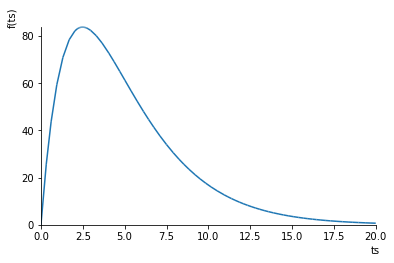

In [99]:
plot(kinetics(ts), (ts,0, 20))

In [109]:
def symbolic_roots(func, times):
    # YOUR CODE HERE
    """
    Solves the kinetic function symbolically
    Arguments:
        func: function to find derivative of
        times: dose times
    Returns: a numpy array symbolizing the derivative
    """
    return solve(diff(func(times)), times)

symbolic_roots(kinetics, ts)

[2.48448486363346]

#### Create a time array

In [102]:
h = 0.01
tn = np.arange(0, 20, h)

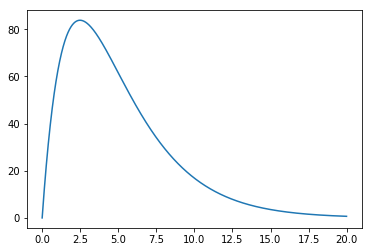

In [103]:
plt.plot(tn, fkinetics(tn))

In [108]:
def numeric_roots(func, ts, h=0.01, search_low=2, search_high=500):
    # YOUR CODE HERE
    """
    Solves the kinetics function numerically
    Arguments:
        func: the function to use the derivative of
        ts: a symbol representing an array
        h: the step size
        search_low: the lower bound to search the array
        search_high: the upper bound to search the array
    Returns:
    """
    abs_func_der = np.abs(d1c(func(ts), h=h))
    numeric_root = ts[search_low:][np.argmin(abs_func_der[search_low:search_high], axis=0)]
    
    return numeric_root